# Yiwen Mei

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [2]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,PedigreeFunc,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   PedigreeFunc   768 non-null    float64
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [5]:
print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  PedigreeFunc         Age     Outcome  
count  768.000000    768.000000  768.000000  768.000000  
mean    31.992578      0.471876   33.240885    0.348958  
std      7.884160      0.331329   11.760232    0.476951  
min      0.000000      0.078000   21.000000    0.000000  
25%     27.300000      0.

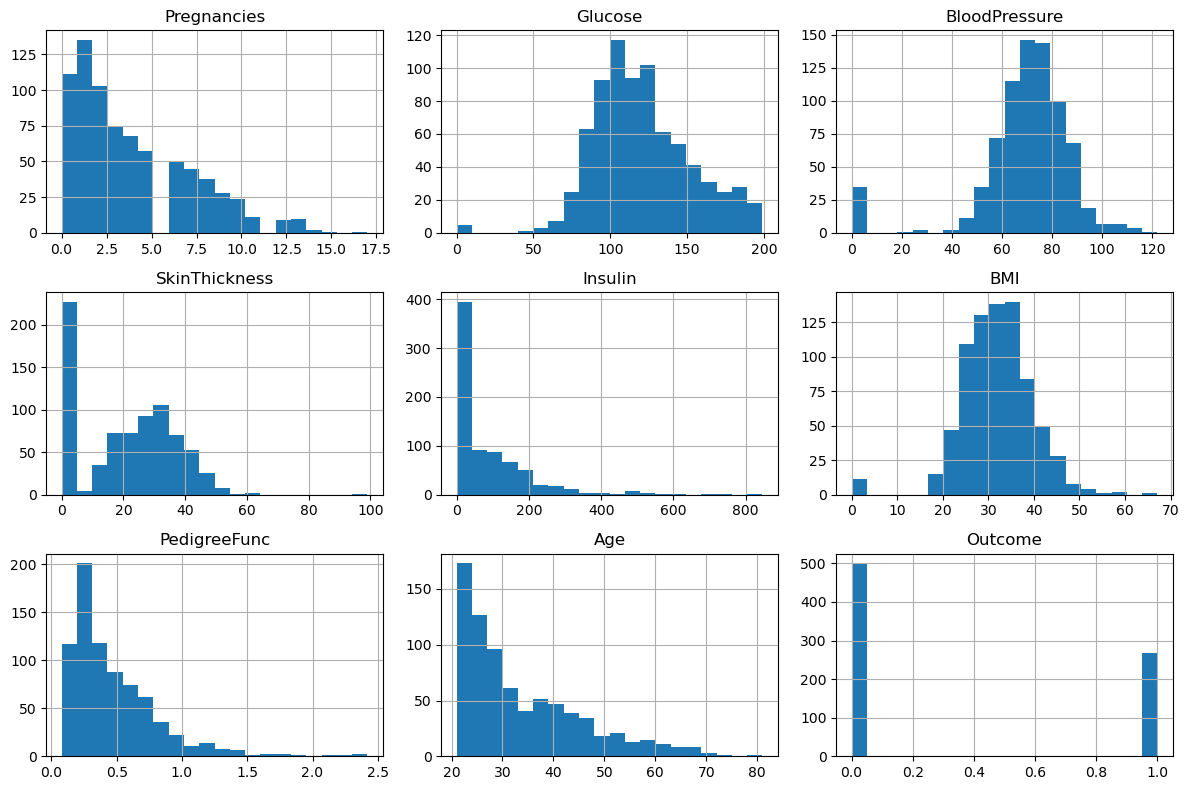

In [6]:
# Histograms for continuous variables
df.hist(figsize=(12, 8), bins=20)
plt.tight_layout()
plt.show()

<Axes: xlabel='Outcome'>

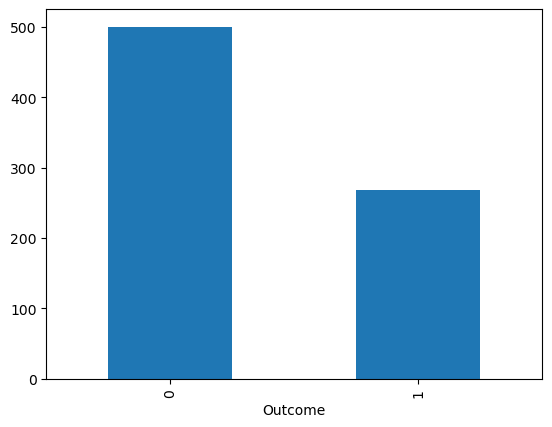

In [7]:
# Bar charts for categorical variables
df['Outcome'].value_counts().plot(kind='bar')

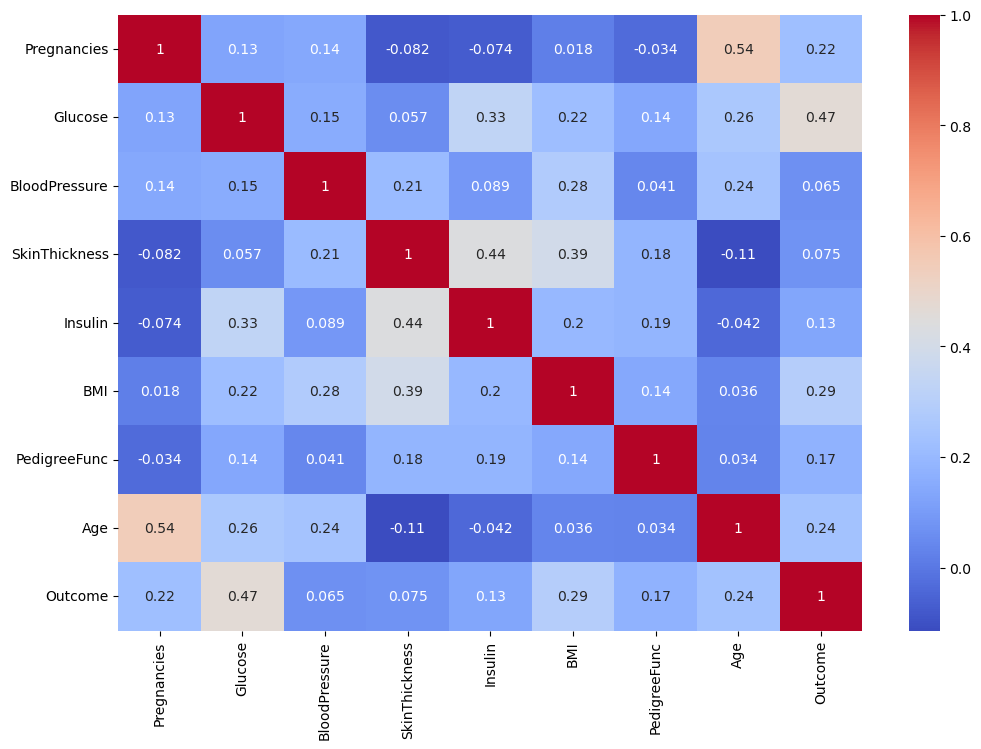

In [8]:
# Correlation matrix heatmap
import seaborn as sns
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

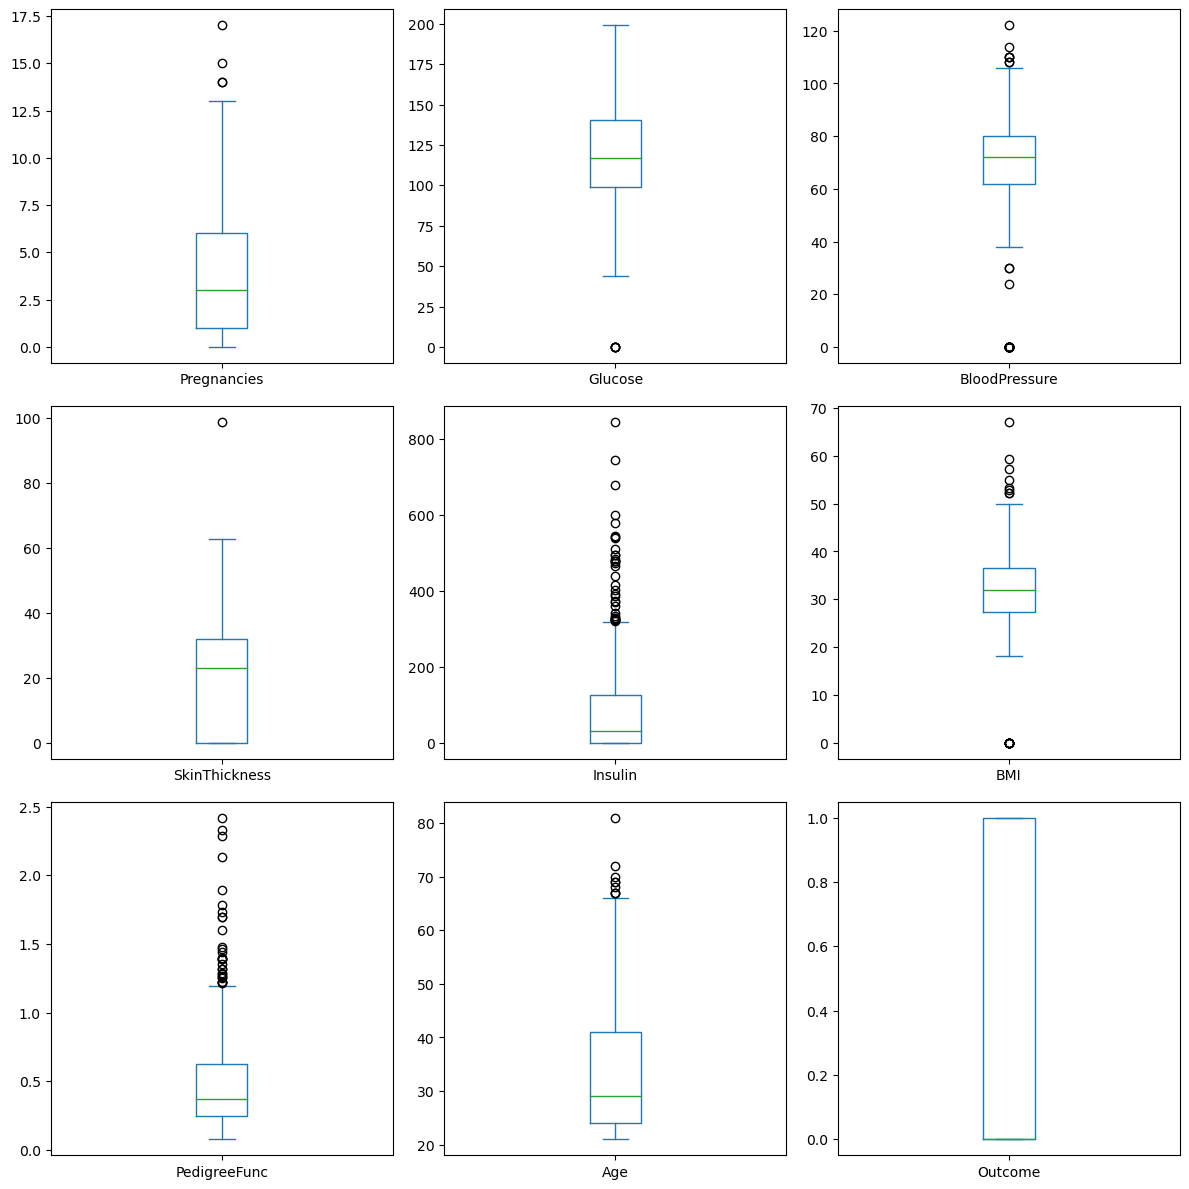

In [10]:
# Boxplots for potential outliers detection
df.plot(kind='box', subplots=True, layout=(3,3), figsize=(12, 12))
plt.tight_layout()
plt.show()

In [4]:
# Number of rows with 0 values

list1 = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

for k in df[list1].columns:
    missing_rows = df.loc[df[k]==0].shape[0]
    print(k + ": " + str(missing_rows))

Glucose: 5
BloodPressure: 35
SkinThickness: 227
Insulin: 374
BMI: 11


In [5]:
df0 = df[df['Outcome'] == 0].copy()
df1 = df[df['Outcome'] == 1].copy()

In [6]:
for i in list1:
 # find averages excluding zeros
    mean_df1 = df1[df1[i] != 0][i].mean()
    mean_df0 = df0[df0[i] != 0][i].mean()
 # replace zeros with the averages
    df1.loc[df1[i] == 0, i] = mean_df1
    df0.loc[df0[i] == 0, i] = mean_df0

In [7]:
df = pd.concat([df0, df1])
df.sort_index(inplace = True)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,PedigreeFunc,Age,Outcome
0,6,148.0,72.0,35.0,206.846154,33.6,0.627,50,1
1,1,85.0,66.0,29.0,130.287879,26.6,0.351,31,0
2,8,183.0,64.0,33.0,206.846154,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.0,130.287879,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,33.0,206.846154,30.1,0.349,47,1


In [8]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, \
                                                stratify = y,\
                                                train_size=0.66,\
                                                test_size=0.33, \
                                                random_state=1)

### 1. Random Forest classification model with 500 trees, max_features = 5, n_estimators = 500,
### and max_depth = 4

In [9]:
forest = RandomForestClassifier(max_features = 5,\
                                n_estimators = 500,\
                                max_depth = 4,random_state = 1)
forest.fit(X_train,y_train)
forest.score(X_test,y_test)

0.8661417322834646

### 2. GridSearchCV on max_features

In [10]:
model3 = RandomForestClassifier(max_depth=4,n_estimators = 500,\
                                random_state=1)

In [11]:
kfold = StratifiedKFold(n_splits=5,shuffle = True,random_state = 1)

In [12]:
features = range(1,9)
params = dict(max_features = features)

In [13]:
grid1 = GridSearchCV(model3,param_grid = params,cv = kfold)
grid1.fit(X_train,y_train);

In [14]:
# Best Validation Accuracy rate
grid1.best_score_

0.8793826441467676

In [15]:
grid1.best_params_

{'max_features': 4}

In [16]:
grid1.score(X_test,y_test)

0.8700787401574803

### 3. What are the best predictors found by Random Forest?

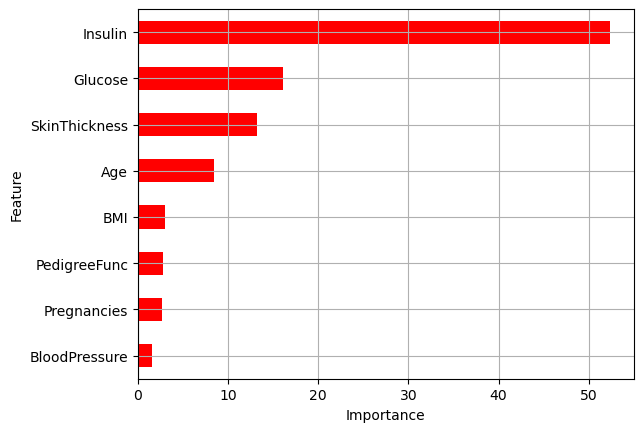

In [17]:
Importance = pd.DataFrame({'Importance':\
                grid1.best_estimator_.feature_importances_*100},
                        index = X.columns)
df8 = Importance.sort_values(by = 'Importance',axis = 0,
                             ascending = True)
df8.plot(kind = 'barh',color = 'r',legend = False)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.grid()

In [18]:
df8

,Importance
BloodPressure,1.551048
Pregnancies,2.618653
PedigreeFunc,2.763701
BMI,3.021733
Age,8.407199
SkinThickness,13.205678
Glucose,16.052309
Insulin,52.379679


### 4. Gradient boosting classification model with 500 trees, learning_rate = 0.1, 
### n_estimators = 500, and max_depth = 4

In [19]:
model4 = GradientBoostingClassifier(n_estimators = 500,
                                    learning_rate = 0.1,
                                    max_depth = 4, 
                                    random_state =1)
model4.fit(X_train,y_train)
model4.score(X_test,y_test)

0.8937007874015748

### 5. GridSearchCV and 5-fold cross validation on learning_rate

In [20]:
model5 = GradientBoostingClassifier(n_estimators = 500,
                                      max_depth = 4, 
                                    random_state =1)

In [21]:
lrates = np.linspace(0.01,1.0,20)
lrates

array([0.01      , 0.06210526, 0.11421053, 0.16631579, 0.21842105,
       0.27052632, 0.32263158, 0.37473684, 0.42684211, 0.47894737,
       0.53105263, 0.58315789, 0.63526316, 0.68736842, 0.73947368,
       0.79157895, 0.84368421, 0.89578947, 0.94789474, 1.        ])

In [22]:
kfold = StratifiedKFold(n_splits=5,shuffle = True,random_state = 1)

In [23]:
params = dict(learning_rate = lrates)

In [24]:
grid2 = GridSearchCV(model5,param_grid = params,cv = kfold)
grid2.fit(X_train,y_train);

In [25]:
# Best Validation Accuracy rate
grid2.best_score_

0.8854008930304795

In [26]:
grid2.best_params_

{'learning_rate': 0.5831578947368421}

In [27]:
grid2.score(X_test,y_test)

0.889763779527559

### 6. What are the best predictors found by Gradient Boosting?

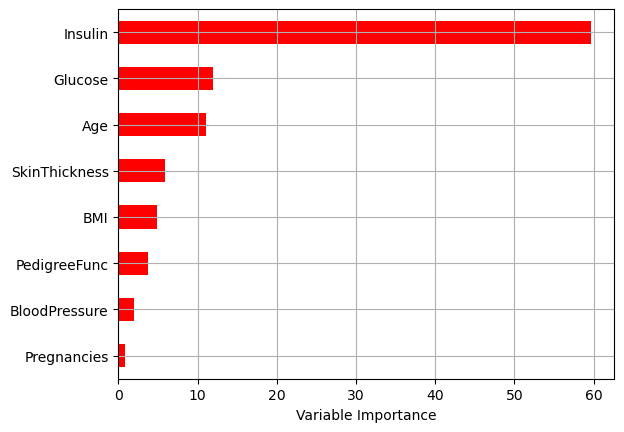

In [28]:
Importance2 = grid2.best_estimator_.feature_importances_*100
Importance2 = pd.DataFrame({'Importance':Importance2},\
                           index = X.columns)
df9 = Importance2.sort_values(by = 'Importance',axis = 0,\
                              ascending = True)
df9.plot(kind = 'barh',color = 'r',legend = False)
plt.xlabel('Variable Importance')
plt.gca().legend_ = None
plt.grid()

In [29]:
df9

,Importance
Pregnancies,0.785995
BloodPressure,2.013042
PedigreeFunc,3.745284
BMI,4.931715
SkinThickness,5.836521
Age,11.114347
Glucose,11.924332
Insulin,59.648764


### 7. Use logistic regression with no regularization to predict Outcome. 

In [30]:
scaler = StandardScaler()
model1 = LogisticRegression(solver = 'lbfgs',C = 1e20,max_iter=10000)
pipe1 = Pipeline([('transformer1', scaler), ('estimator1', model1)])
scores = cross_val_score(pipe1,X,y,cv=kfold)
scores
scores.mean()

0.7876920465155759

### 8. Use logistic regression with regularization to predict Outcome. Use GridSearchCV and 5-fold cross
### validation to find the best regularization parameter. 

In [31]:
Cvalues = np.arange(0.01,1.50,0.001)
Cvalues

array([0.01 , 0.011, 0.012, ..., 1.497, 1.498, 1.499])

In [32]:
kfold = StratifiedKFold(n_splits=5,shuffle = True,random_state = 1)

In [33]:
scaler = StandardScaler()
model = LogisticRegression(solver = 'lbfgs', max_iter=10000)
pipe1 = Pipeline([('scaler', scaler),('model', model)])

In [34]:
regularization_params = {'C': Cvalues}

In [35]:
grid3 = GridSearchCV(model,param_grid = regularization_params,\
                     cv = kfold)
grid3.fit(X_train,y_train);

In [36]:
# Best Validation Accuracy rate
grid3.best_score_

0.7963696369636963

In [37]:
grid3.best_params_

{'C': 1.185999999999999}

In [38]:
grid3.score(X_test,y_test)

0.7874015748031497

### 9. Neural Network

In [39]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, \
                                                stratify = y,\
                                                train_size = 0.76, \
                                                random_state=1)

In [40]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 1) First model with a hidden layer with 24 nodes and the output layer with 1 node

In [41]:
network1 = keras.Sequential([ 
    layers.Dense(24,activation='relu'),
    layers.Dense(1,activation='sigmoid')
])

network1.compile(optimizer='rmsprop', loss='binary_crossentropy',
metrics=['accuracy'])

n_epochs = 400
history = network1.fit(X_train_scaled, y_train,
                       epochs=n_epochs, batch_size = 48,
                       validation_split = 0.20, verbose = 0)

In [42]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [43]:
df9 = pd.DataFrame(history_dict)
df9.index = range(1,401)
df9

,loss,accuracy,val_loss,val_accuracy
1,0.716593,0.435622,0.656349,0.589744
2,0.669415,0.585837,0.628835,0.700855
3,0.636643,0.673820,0.605707,0.743590
4,0.608257,0.727468,0.585534,0.760684
5,0.583134,0.774678,0.567302,0.769231
...,...,...,...,...
396,0.255146,0.907725,0.476584,0.760684
397,0.254364,0.907725,0.476853,0.760684
398,0.254510,0.907725,0.477094,0.760684
399,0.254133,0.905579,0.476449,0.760684


In [44]:
df9[df9.val_loss==df9.val_loss.min()]

,loss,accuracy,val_loss,val_accuracy
181,0.294938,0.869099,0.452091,0.777778


In [45]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1,401)

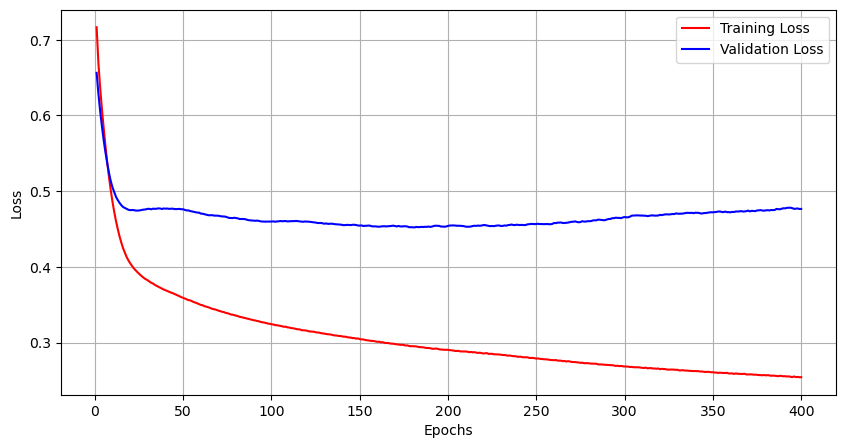

In [46]:
plt.figure(figsize=(10,5))
plt.plot(epochs,loss_values,'r',
         label='Training Loss')
plt.plot(epochs,val_loss_values,'b',
         label='Validation Loss')
#plt.xticks(epochs)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

### Retrain the model using best number of epochs

In [47]:
network1 = keras.Sequential([ 
layers.Dense(24,activation='relu'),
layers.Dense(1,activation='sigmoid')])

network1.compile(optimizer='rmsprop', loss='binary_crossentropy',
metrics=['accuracy'])

n_epochs = 181
history = network1.fit(X_train_scaled, y_train,
                       epochs=n_epochs, batch_size = 48, verbose = 0)

In [48]:
test_loss,test_acc = network1.evaluate(X_test_scaled,y_test)

6/6 [==============================] - 0s 680us/step - loss: 0.3982 - accuracy: 0.8486


In [49]:
test_loss

0.3982083201408386

In [50]:
test_acc

0.8486486673355103

### 2) Second model: 2 hidden layers with 32 and 16 nodes

In [51]:
network1 = keras.Sequential([ 
    layers.Dense(32,activation='relu'),
    layers.Dense(16,activation='relu'),
    layers.Dense(1,activation='sigmoid')])

network1.compile(optimizer='rmsprop', loss='binary_crossentropy',
metrics=['accuracy'])

n_epochs = 400
history = network1.fit(X_train_scaled, y_train,
                       epochs=n_epochs, batch_size = 48,
                       validation_split = 0.20, verbose = 0)

In [52]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [53]:
df9 = pd.DataFrame(history_dict)
df9.index = range(1,401)
df9

,loss,accuracy,val_loss,val_accuracy
1,0.692139,0.564378,0.665367,0.641026
2,0.638053,0.708154,0.632569,0.700855
3,0.598945,0.742489,0.605123,0.709402
4,0.564720,0.755365,0.580247,0.735043
5,0.532702,0.776824,0.558557,0.735043
...,...,...,...,...
396,0.037464,0.993562,1.022848,0.760684
397,0.037661,0.993562,1.049461,0.760684
398,0.037010,0.993562,1.042233,0.777778
399,0.036901,0.993562,1.054246,0.760684


In [54]:
df9[df9.val_loss==df9.val_loss.min()]

,loss,accuracy,val_loss,val_accuracy
67,0.276536,0.890558,0.455031,0.820513


In [55]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1,401)

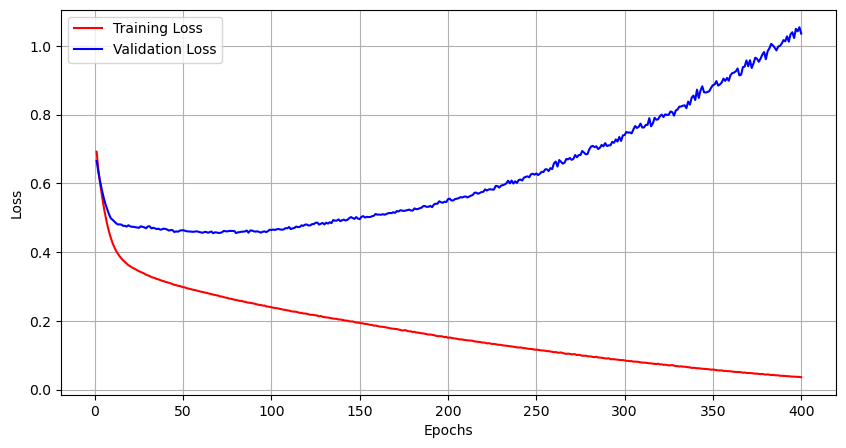

In [56]:
plt.figure(figsize=(10,5))
plt.plot(epochs,loss_values,'r',
         label='Training Loss')
plt.plot(epochs,val_loss_values,'b',
         label='Validation Loss')
#plt.xticks(epochs)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

### Retrain the model using best number of epochs

In [57]:
network1 = keras.Sequential([ 
    layers.Dense(32,activation='relu'),
    layers.Dense(16,activation='relu'),
    layers.Dense(1,activation='sigmoid')])

network1.compile(optimizer='rmsprop', loss='binary_crossentropy',
metrics=['accuracy'])

n_epochs = 67
history = network1.fit(X_train_scaled, y_train,
                       epochs=n_epochs, batch_size = 48, verbose = 0)

In [58]:
test_loss,test_acc = network1.evaluate(X_test_scaled,y_test)

6/6 [==============================] - 0s 669us/step - loss: 0.3845 - accuracy: 0.8595


In [59]:
test_loss

0.3844742774963379

In [60]:
test_acc

0.8594594597816467